# Lending Club - Case Study

EDA to understand how consumer attributes and loan attributes influence the tendency to default

Steps we are going to follow for EDA:
1. Understand the dataset 
2. Clean and filter the data 
3. Data analysis 
4. Draw conclusions

| Dataset | Description | 
| --- | --- | 
| [Loan Data Set](https://cdn.upgrad.com/UpGrad/temp/3ba74fb7-bd88-4854-8597-1c225a5aed99/loan.zip) | This contains the complete loan data for all loans issued through the time period 2007-2011. | 
| [Data Dictionary](https://cdn.upgrad.com/UpGrad/temp/af860da6-f838-47d6-ad97-551022550ee4/Data_Dictionary.xlsx) | This dataset describes the meaning of the variables mentioned in the Loan Data Set. | 

## Step 0: Pre-requisites

Importing all the required libraries for our EDA

In [1]:
# Built-in libraries
import os
import re
import ssl
from datetime import datetime as dt
from io import BytesIO, StringIO
from urllib.request import urlopen
from zipfile import ZipFile

# Third-party libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Code to handle SSL configuration

In [2]:
if not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context

Get the contents of the provided zip file URL for the loan dataset in a dictionary

In [3]:
# loan_data_set_url = r'https://cdn.upgrad.com/UpGrad/temp/3ba74fb7-bd88-4854-8597-1c225a5aed99/loan.zip'
loan_data_set_url = r'https://raw.githubusercontent.com/rahul-nanwani/lending-club/master/datasets/loan.zip'
loan_data_set = {}
with urlopen(loan_data_set_url) as resp:
    with ZipFile(BytesIO(resp.read()), 'r') as zf:
        for filename in zf.namelist():
            loan_data_set[filename] = zf.open(filename).read().decode('utf-8')

Check the files found from the zip file

In [4]:
list(loan_data_set.keys())

['loan.csv']

Use the `loan.csv` file to create a dataframe

In [5]:
loan_data_set = StringIO(loan_data_set['loan.csv'])
df = pd.read_csv(loan_data_set)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


It would be handy to have a dataframe with the descriptions of the columns we have left. 

*Since I had opened the sheet locally I can tell that we will only require `LoanStats` sheet.*

In [6]:
# data_dict_url = r'https://cdn.upgrad.com/UpGrad/temp/af860da6-f838-47d6-ad97-551022550ee4/Data_Dictionary.xlsx'
data_dict_url = r'https://raw.githubusercontent.com/rahul-nanwani/lending-club/master/datasets/Data_Dictionary.xlsx'
data_dict = pd.read_excel(data_dict_url, sheet_name='LoanStats')
data_dict.columns = ['Name', 'Description']

## Step 1: Understand the dataset 

It is important to know the count of the rows and columns of the dataset we are using for our EDA 

In [7]:
df.shape

(39717, 111)

It is also important to know how the rows look like 

In [8]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [9]:
df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


Now we glance through the [Data Dictionary](https://cdn.upgrad.com/UpGrad/temp/af860da6-f838-47d6-ad97-551022550ee4/Data_Dictionary.xlsx) provided for the loan dataset. 

In [11]:
data_dict = data_dict[data_dict['Name'].isin(df.columns)]
data_dict.reset_index(inplace=True, drop=True)
data_dict

,Name,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
104,total_rec_late_fee,Late fees received to date
105,total_rec_prncp,Principal received to date
106,url,URL for the LC page with listing data.
107,verification_status,"Indicates if income was verified by LC, not ve..."


Our target variable is `loan_status`

## Step 2. Clean and filter the data 

It is important that we have clean and good quality data for the analysis. We need to ensure that the data we are using is not based on assumptions, so it is good that we drop the highly missing data. 

### Filter

#### Drop columns with high missing data ratio

Check the columns with the highest missing data ratio

In [12]:
df.isna().mean().sort_values(ascending=False).head(10)

verification_status_joint    1.0
annual_inc_joint             1.0
mo_sin_old_rev_tl_op         1.0
mo_sin_old_il_acct           1.0
bc_util                      1.0
bc_open_to_buy               1.0
avg_cur_bal                  1.0
acc_open_past_24mths         1.0
inq_last_12m                 1.0
total_cu_tl                  1.0
dtype: float64

Let us remove the columns without any data and recheck the ratio

In [13]:
df = df.loc[:, df.isna().mean()<1]

In [14]:
df.isna().mean().sort_values(ascending=False).head(10)

next_pymnt_d                  0.971297
mths_since_last_record        0.929854
mths_since_last_delinq        0.646625
desc                          0.325805
emp_title                     0.061913
emp_length                    0.027066
pub_rec_bankruptcies          0.017549
last_pymnt_d                  0.001788
chargeoff_within_12_mths      0.001410
collections_12_mths_ex_med    0.001410
dtype: float64

Let us also eliminate the columns with more than or equal to 30% of missing data, since everything there will not be of any use to us 

In [15]:
df = df.loc[:, df.isna().mean()<0.3]

#### Drop columns with just 1 unique value

Let us now check for the count of unique values in a column. Columns with just one unqiue value will not benefit us so we can drop those

In [16]:
df.nunique().sort_values(ascending=True).head(10)

tax_liens                     1
delinq_amnt                   1
chargeoff_within_12_mths      1
acc_now_delinq                1
application_type              1
policy_code                   1
collections_12_mths_ex_med    1
initial_list_status           1
pymnt_plan                    1
term                          2
dtype: int64

In [17]:
df = df.loc[:, df.nunique()!=1]

In [18]:
df.shape

(39717, 44)

#### Drop row duplicates

Now we need to check if there are any duplicates

In [19]:
df[df.duplicated()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies


Let us see what columns we are left with along with their data type

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

#### Drop irrelevant columns 

Now we can drop the columns that won't help us in our analysis. We can drop the behavioural variables that are generated after the loan approved or are not available at the time of loan application. We can also drop irrelevant demographical variables. 


In [21]:
behavioural_columns = [
    'collection_recovery_fee',
    'delinq_2yrs',
    'earliest_cr_line',
    'inq_last_6mths',
    'last_credit_pull_d',
    'last_pymnt_amnt',
    'last_pymnt_d',
    'open_acc',
    'out_prncp',
    'out_prncp_inv',
    'pub_rec',
    'recoveries',
    'revol_bal',
    'revol_util',
    'total_acc',
    'total_pymnt',
    'total_pymnt_inv',
    'total_rec_int',
    'total_rec_late_fee',
    'total_rec_prncp'
]
demographical_columns = [
    'emp_title', 
    'id', 
    'member_id', 
    'title', 
    'url', 
    'zip_code'
]

In [22]:
df.drop(behavioural_columns+demographical_columns, axis=1, inplace=True)

#### Drop irrelevant rows

We don't need rows which are on-going loans, as we cannot say if it is a defaulted loan or has paid-off. We can drop these rows.

In [23]:
df = df[df['loan_status']!='Current']
df.reset_index(inplace=True, drop=True)

In [24]:
data_dict = data_dict[data_dict['Name'].isin(df.columns)]
data_dict.reset_index(inplace=True, drop=True)
data_dict

,Name,Description
0,addr_state,The state provided by the borrower in the loan...
1,annual_inc,The self-reported annual income provided by th...
2,dti,A ratio calculated using the borrower’s total ...
3,emp_length,Employment length in years. Possible values ar...
4,funded_amnt,The total amount committed to that loan at tha...
5,funded_amnt_inv,The total amount committed by investors for th...
6,grade,LC assigned loan grade
7,home_ownership,The home ownership status provided by the borr...
8,installment,The monthly payment owed by the borrower if th...
9,int_rate,Interest Rate on the loan


### Clean

#### Handling missing values

In [25]:
df.isna().mean().sort_values(ascending=False)

emp_length              0.026778
pub_rec_bankruptcies    0.018068
annual_inc              0.000000
dti                     0.000000
addr_state              0.000000
purpose                 0.000000
loan_status             0.000000
issue_d                 0.000000
verification_status     0.000000
loan_amnt               0.000000
funded_amnt             0.000000
sub_grade               0.000000
grade                   0.000000
installment             0.000000
int_rate                0.000000
term                    0.000000
funded_amnt_inv         0.000000
home_ownership          0.000000
dtype: float64

Since we have very low proportion of missing values it is safe to drop these rows

In [26]:
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


#### Standardise data 

Now let us go through each object column to check its actual data and clean if required 

In [27]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.0
4,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0.0


- Term has only 2 unique values i.e. 36 months and 60 months we can remove the months suffix later on if required. 
- For now we can clean `int_rate`, `emp_length`, and `issue_d` as required.

In [28]:
df['int_rate'] = df['int_rate'].apply(lambda x: float(re.sub(r'[^.\d]', '', x)))

In [29]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years'],
      dtype=object)

Let us assume that \< 1 year as 0 and 10+ years as 10
We will extract the first two characters and typecast into int except for \< 1 year

In [30]:
df['emp_length'] = df['emp_length'].apply(lambda x: 0 if x == '< 1 year' else int(re.sub(r'\D', '', x)))

We need only month for our analysis, let us keep only month and set its column type as category. 

In [31]:
df['issue_d'] = df['issue_d'].apply(lambda x: dt.strptime(x, '%b-%y')).dt.month

In [32]:
df['issue_d'] = df['issue_d'].astype('category')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36847 entries, 0 to 36846
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   loan_amnt             36847 non-null  int64   
 1   funded_amnt           36847 non-null  int64   
 2   funded_amnt_inv       36847 non-null  float64 
 3   term                  36847 non-null  object  
 4   int_rate              36847 non-null  float64 
 5   installment           36847 non-null  float64 
 6   grade                 36847 non-null  object  
 7   sub_grade             36847 non-null  object  
 8   emp_length            36847 non-null  int64   
 9   home_ownership        36847 non-null  object  
 10  annual_inc            36847 non-null  float64 
 11  verification_status   36847 non-null  object  
 12  issue_d               36847 non-null  category
 13  loan_status           36847 non-null  object  
 14  purpose               36847 non-null  object  
 15  ad

`pub_rec_bankruptcies` should be of type int64 but is being represented as float64. This could be because it had null values

In [34]:
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].astype('int64')

Let us see how dataframe look like now

In [35]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,12,Fully Paid,credit_card,AZ,27.65,0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,12,Charged Off,car,GA,1.00,0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,12,Fully Paid,small_business,IL,8.72,0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,12,Fully Paid,other,CA,20.00,0
4,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,12,Fully Paid,wedding,AZ,11.20,0


All the remaining columns of type object are categorical variables here 

Since `emp_length` and `pub_rec_bankruptcies` will have values from only a set of values we can consider these are categorical variables

In [36]:
categorical_columns = df.select_dtypes(include=[object]).columns.tolist()

In [37]:
categorical_columns += ['emp_length', 'pub_rec_bankruptcies']

In [38]:
df[categorical_columns] = df[categorical_columns].astype('category')

#### Creating column variables

In [39]:
categorical_columns.remove('loan_status')

In [40]:
numerical_columns = df.select_dtypes(include=[int, float]).columns.tolist()

In [41]:
data_dict = data_dict[data_dict['Name'].isin(df.columns)]
data_dict.reset_index(inplace=True, drop=True)

#### Handle outliers

In [42]:
df.describe(percentiles=[0.05, .95])

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti
count,36847.000000,36847.000000,36847.000000,36847.000000,36847.000000,3.684700e+04,36847.000000
mean,11141.327652,10872.924526,10430.400856,11.988346,324.694599,6.940448e+04,13.330449
std,7369.988994,7109.330771,7008.919431,3.702091,208.886154,6.402747e+04,6.651565
min,500.000000,500.000000,0.000000,5.420000,16.080000,4.000000e+03,0.000000
5%,2400.000000,2400.000000,2000.000000,6.170000,72.790000,2.400000e+04,2.180000
50%,10000.000000,9600.000000,9000.000000,11.860000,280.000000,6.000000e+04,13.420000
95%,25000.000000,25000.000000,24643.267336,18.390000,763.111000,1.419988e+05,23.810000
max,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,6.000000e+06,29.990000


We can see extreme outliers and we will use the following formulas to calulate the upper and the lower limits to identify and remove the outliers.

`IQR = Q3 - Q1`

`upper = Q3 + 1.5 * IQR`

`lower = Q1 - 1.5 * IQR`

In [43]:
for idx, col in enumerate(numerical_columns):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR

    df = df[df[col]>lower]
    df = df[df[col]<upper]

## Step 3. Data Analysis

In [44]:
data_dict

,Name,Description
0,addr_state,The state provided by the borrower in the loan...
1,annual_inc,The self-reported annual income provided by th...
2,dti,A ratio calculated using the borrower’s total ...
3,emp_length,Employment length in years. Possible values ar...
4,funded_amnt,The total amount committed to that loan at tha...
5,funded_amnt_inv,The total amount committed by investors for th...
6,grade,LC assigned loan grade
7,home_ownership,The home ownership status provided by the borr...
8,installment,The monthly payment owed by the borrower if th...
9,int_rate,Interest Rate on the loan


In [45]:
df.shape

(33056, 18)

### Univariate Analysis 

#### Categorical variables

##### Count Plots

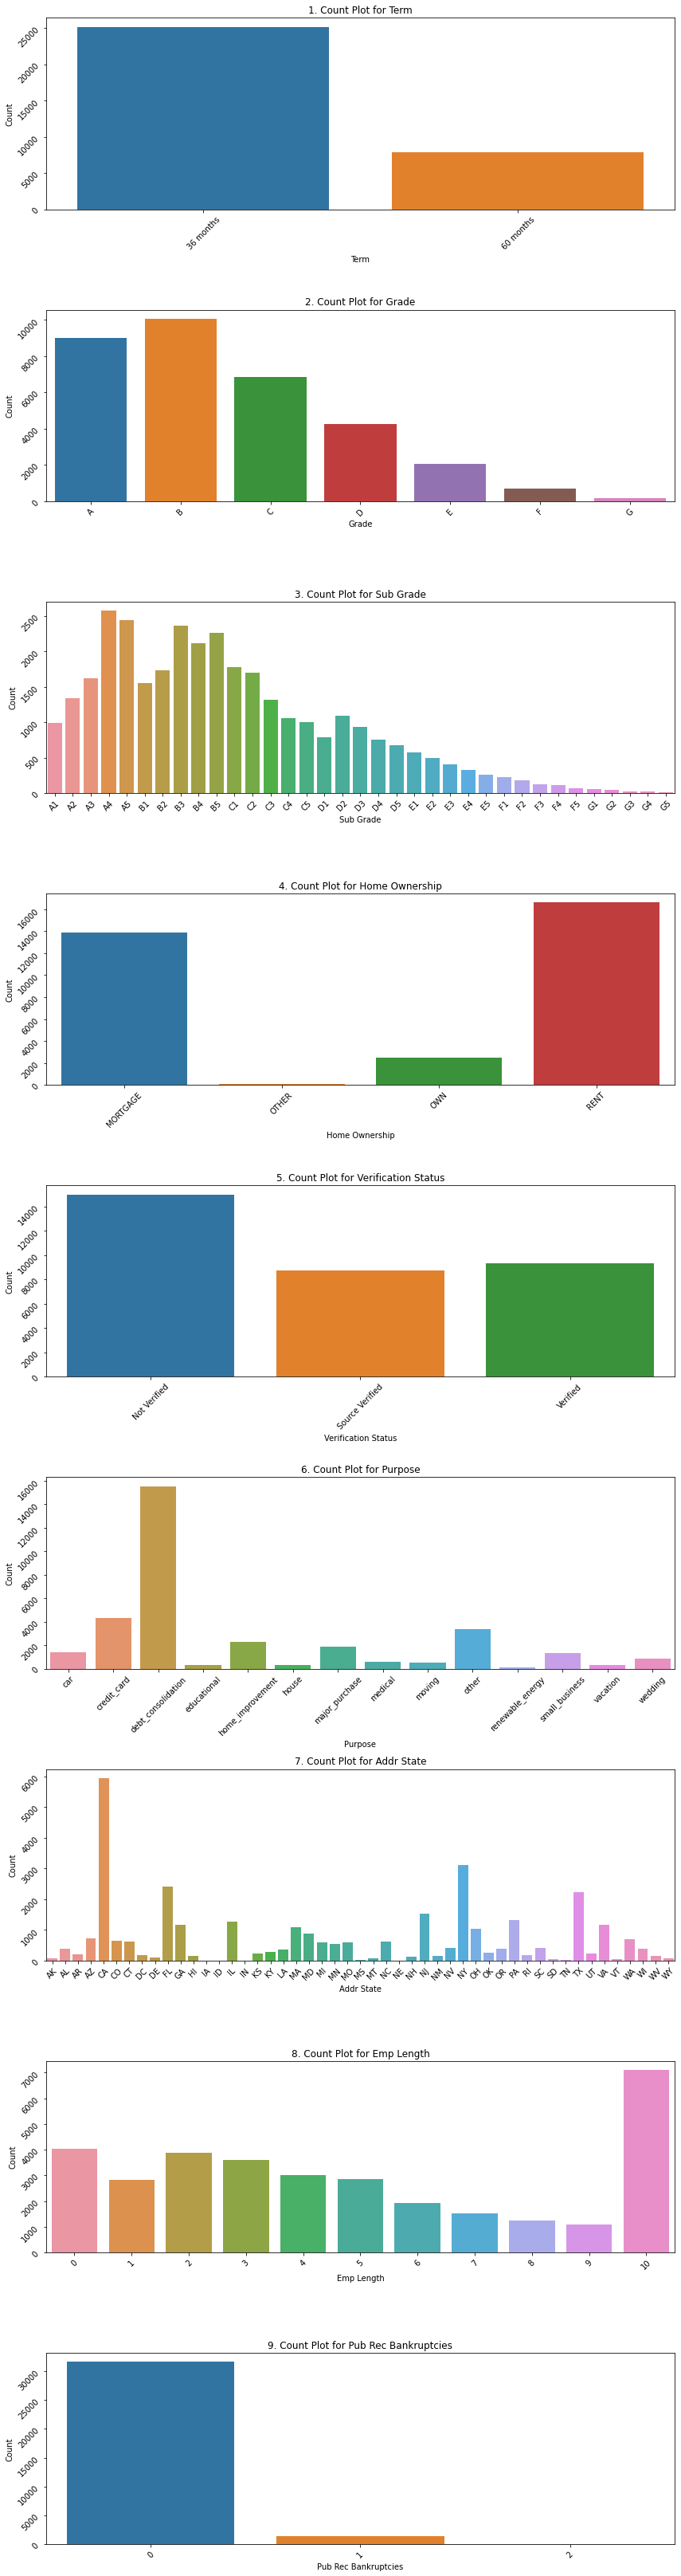

In [46]:
fig, axs = plt.subplots(nrows=9, ncols=1, figsize=(12, 45))
subplots = axs.flatten()

for idx, col in enumerate(categorical_columns):
    col_name = col.replace('_', ' ').title()
    ax = subplots[idx]

    sns.countplot(x=col, data=df, ax=ax)

    ax.set_title(f"{idx+1}. Count Plot for {col_name}")
    ax.tick_params(labelrotation=45)
    ax.set_xlabel(col_name)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

- We should only consider `term`, `verification_status`, and `emp_length` for our bivariate analysis as the other do not have enough readings for making a conclusion. 
- We can consider `grade` but we need to ignore `F` and `G` grades in our analysis.
- We can consider `home_ownership` but we also need to ignore `other` category in our analysis.


#### Numerical variables

##### Box Plots

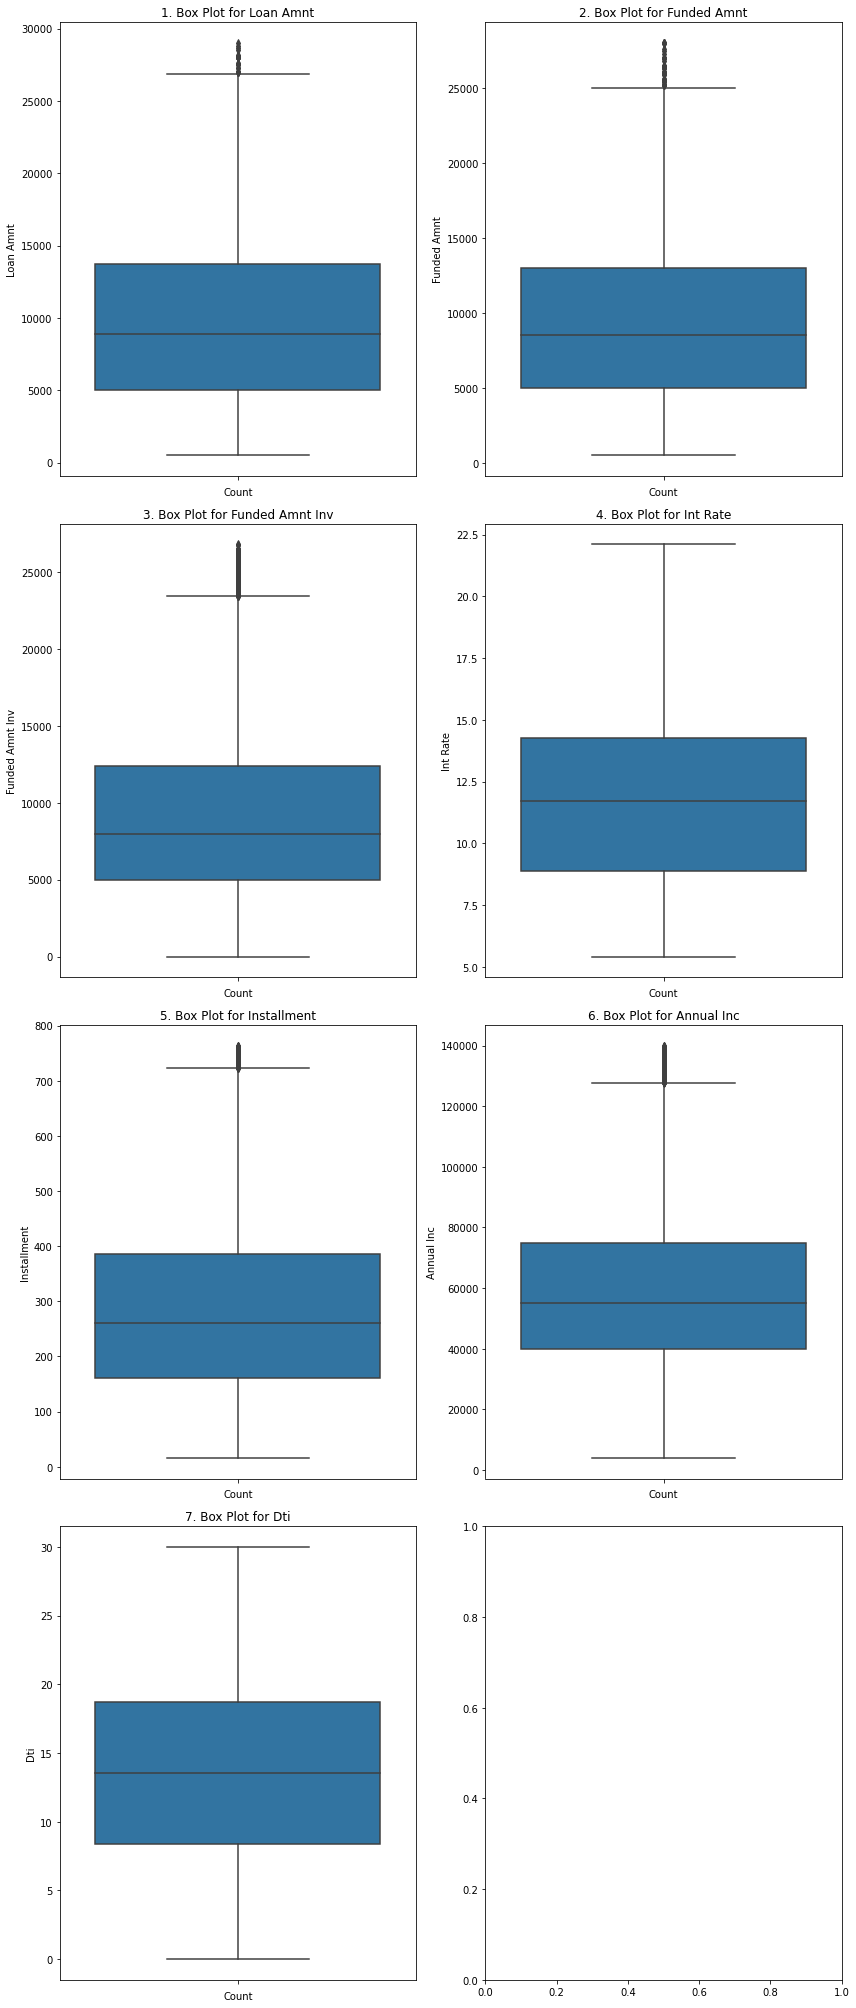

In [47]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(12, 28))
subplots = axs.flatten()

for idx, col in enumerate(numerical_columns):
    col_name = col.replace('_', ' ').title()
    ax = subplots[idx]

    sns.boxplot(y=df[col], ax=ax)

    ax.set_title(f"{idx+1}. Box Plot for {col_name}")
    ax.set_xlabel('Count')
    ax.set_ylabel(col_name)
    
plt.tight_layout()
plt.show()

- We can see that all the variables still have outliers except `int_rate` and `dti`.
- In this case it would be helpful to plot histograms.

##### Hist Plots

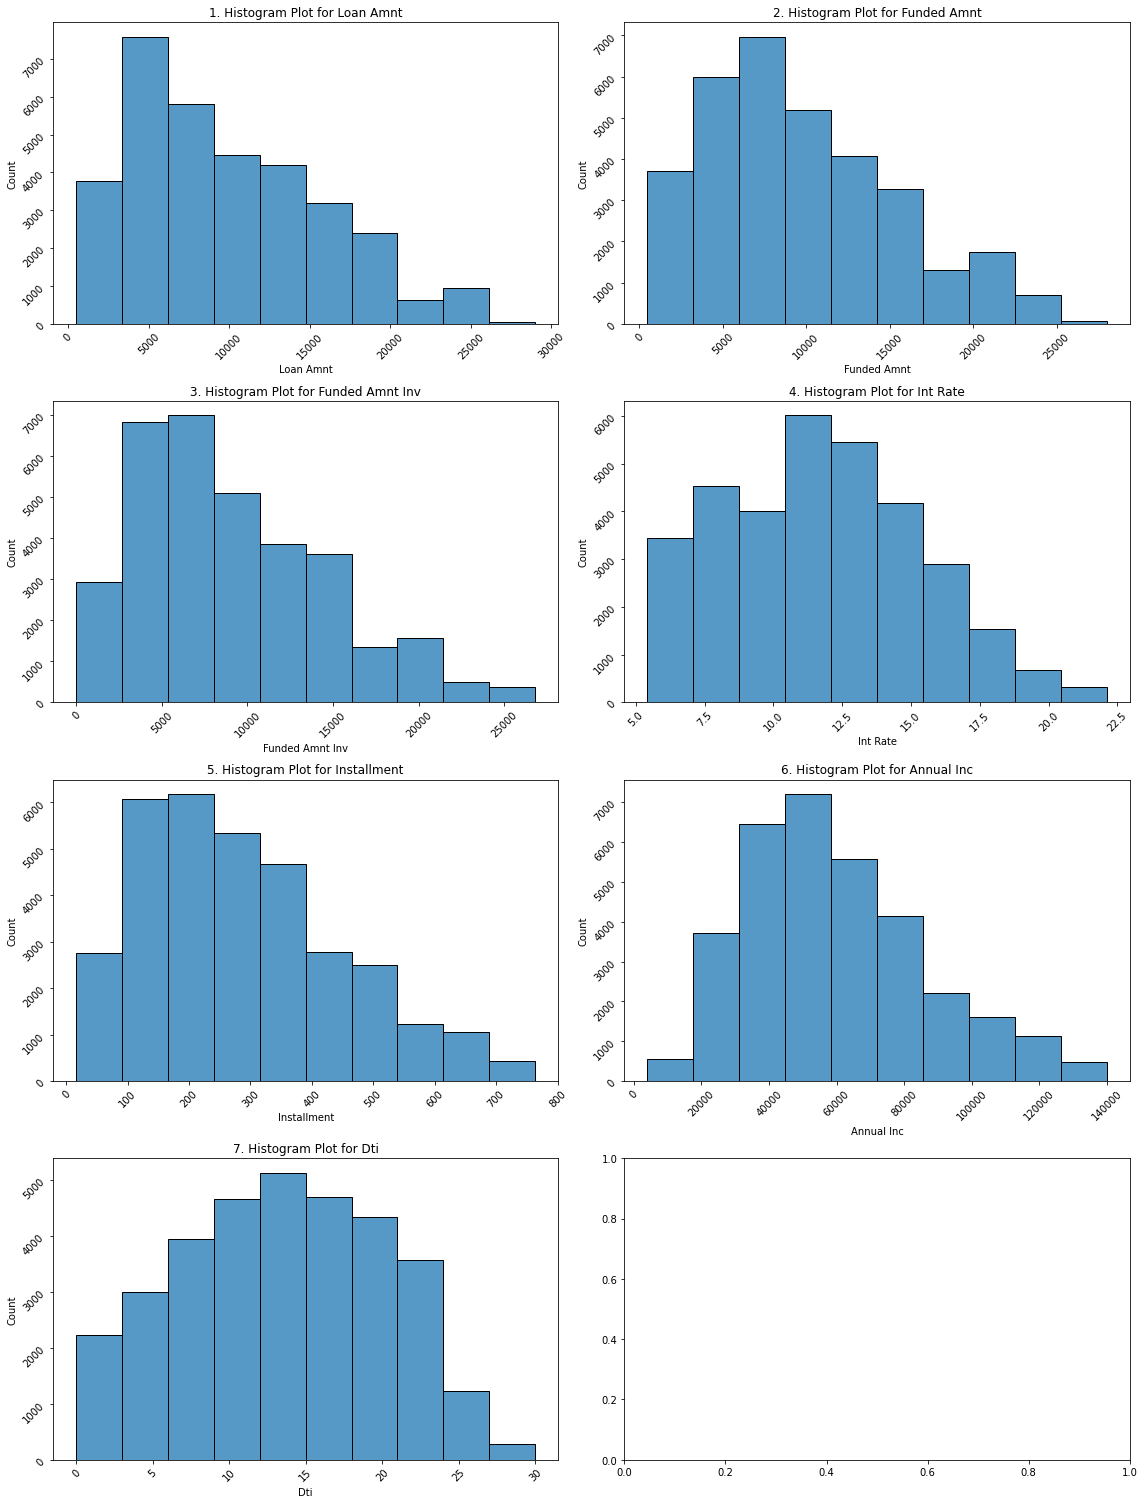

In [48]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(16, 21))
subplots = axs.flatten()

for idx, col in enumerate(numerical_columns):
    col_name = col.replace('_', ' ').title()
    ax = subplots[idx]

    sns.histplot(x=df[col], bins=10, ax=ax)

    ax.set_title(f"{idx+1}. Histogram Plot for {col_name}")
    ax.set_xlabel(col_name)
    ax.set_ylabel('Count')
    ax.tick_params(labelrotation=45)
    
plt.tight_layout()
plt.show()

- We can consider `funded_amnt`, `int_rate`, `annual_inc`, and `dti` for our analysis as the other data we have is extremely right skewed.

### Bivariate Analysis 

#### Loan Status vs Categorical Variables

##### Stack Bar Plots

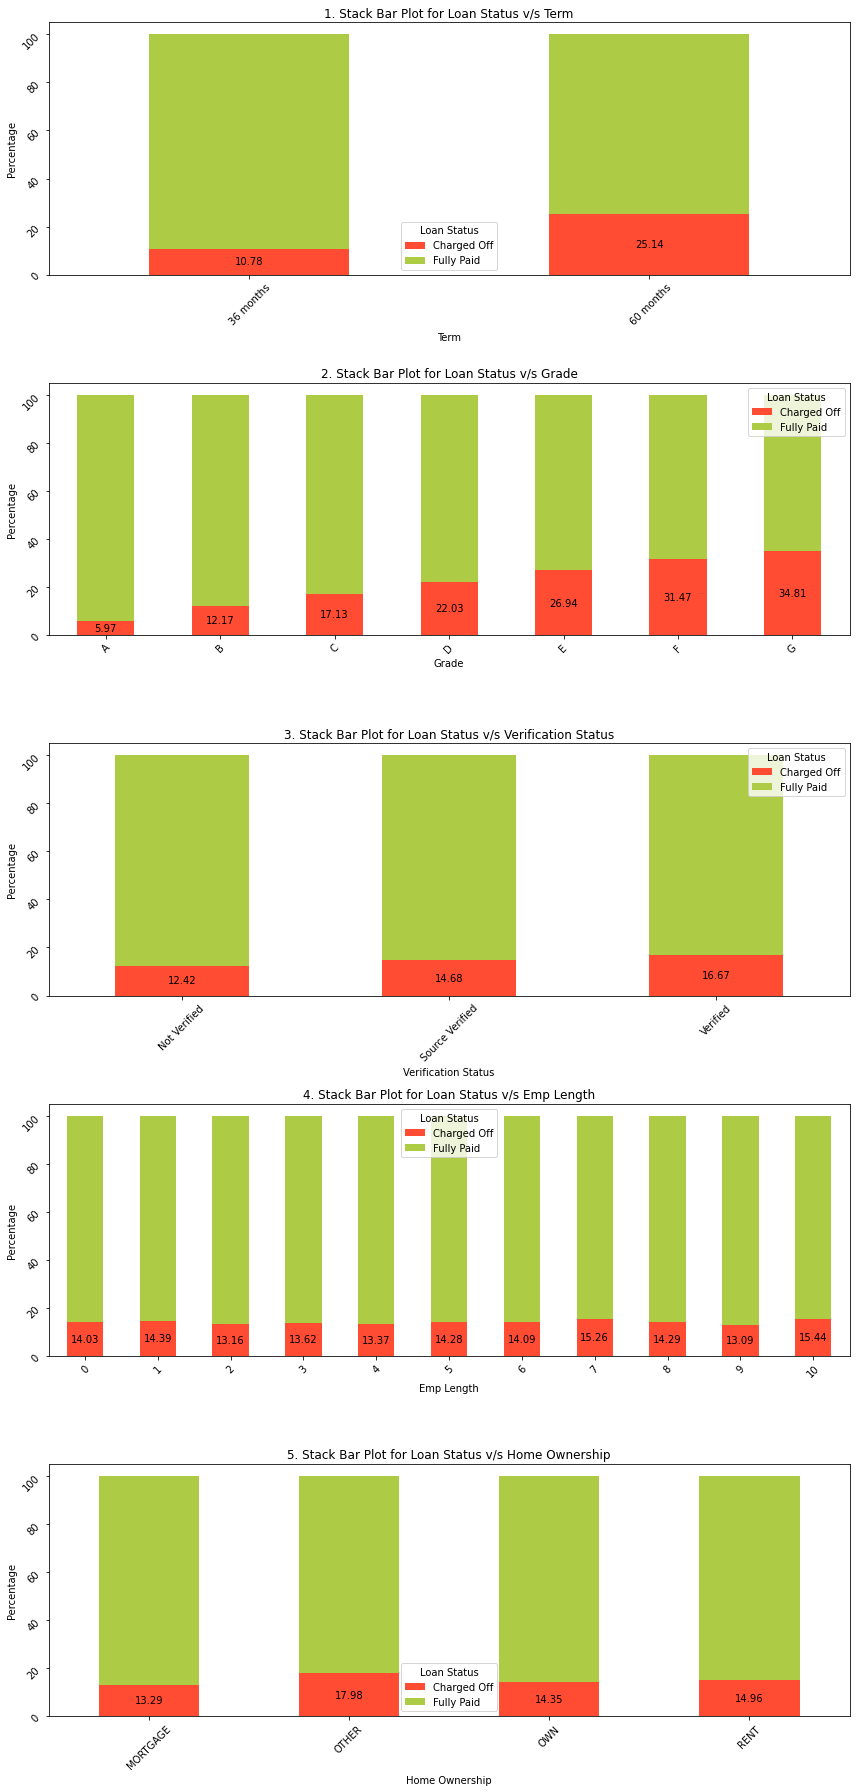

In [49]:
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(12, 25))
subplots = axs.flatten()

for idx, col in enumerate(['term', 'grade', 'verification_status', 'emp_length', 'home_ownership']):
    col_name = col.replace('_', ' ').title()
    ax = subplots[idx]

    table = (pd.crosstab(df[col], df['loan_status']).div(df.groupby(col)['loan_status'].count(), axis=0).mul(100).round(2))

    table.plot(kind='bar', stacked=True,  color=['#FF4C33', "#AECB46"], ax=ax)

    ax.set_title(f"{idx+1}. Stack Bar Plot for Loan Status v/s {col_name}")
    ax.legend(title='Loan Status')
    ax.set_xlabel(col_name)
    ax.set_ylabel('Percentage')
    ax.tick_params(labelrotation=45)
    ax.bar_label(ax.containers[0], label_type='center')

plt.tight_layout()
plt.show()

- **Term**: Loans taken for 60 months are almost 2.5x more likely to default as compared to loans taken for 36 months.
- **Grade**: This clearly states the risk factor increases as the grade increases from A through G. *We do ignore F and G grades as we do not have enough data but we do see a pattern here.*
- **Verification Status**: Status being source verified and verified slightly increases the default rate. 
- **Employment Length**: We can see there is very slight deviation in the default rates in across the employment terms. Hence, it does not have much impact with the risk.
- **Home Ownership**: We need to ignore `other` category in our analysis, hence, we can see that owned or rented home ownerships are a bit more likely to default than the mortgaged. But this is very slight difference and could change with more data. 

#### Loan Status vs Numerical Variables

##### Box Plots

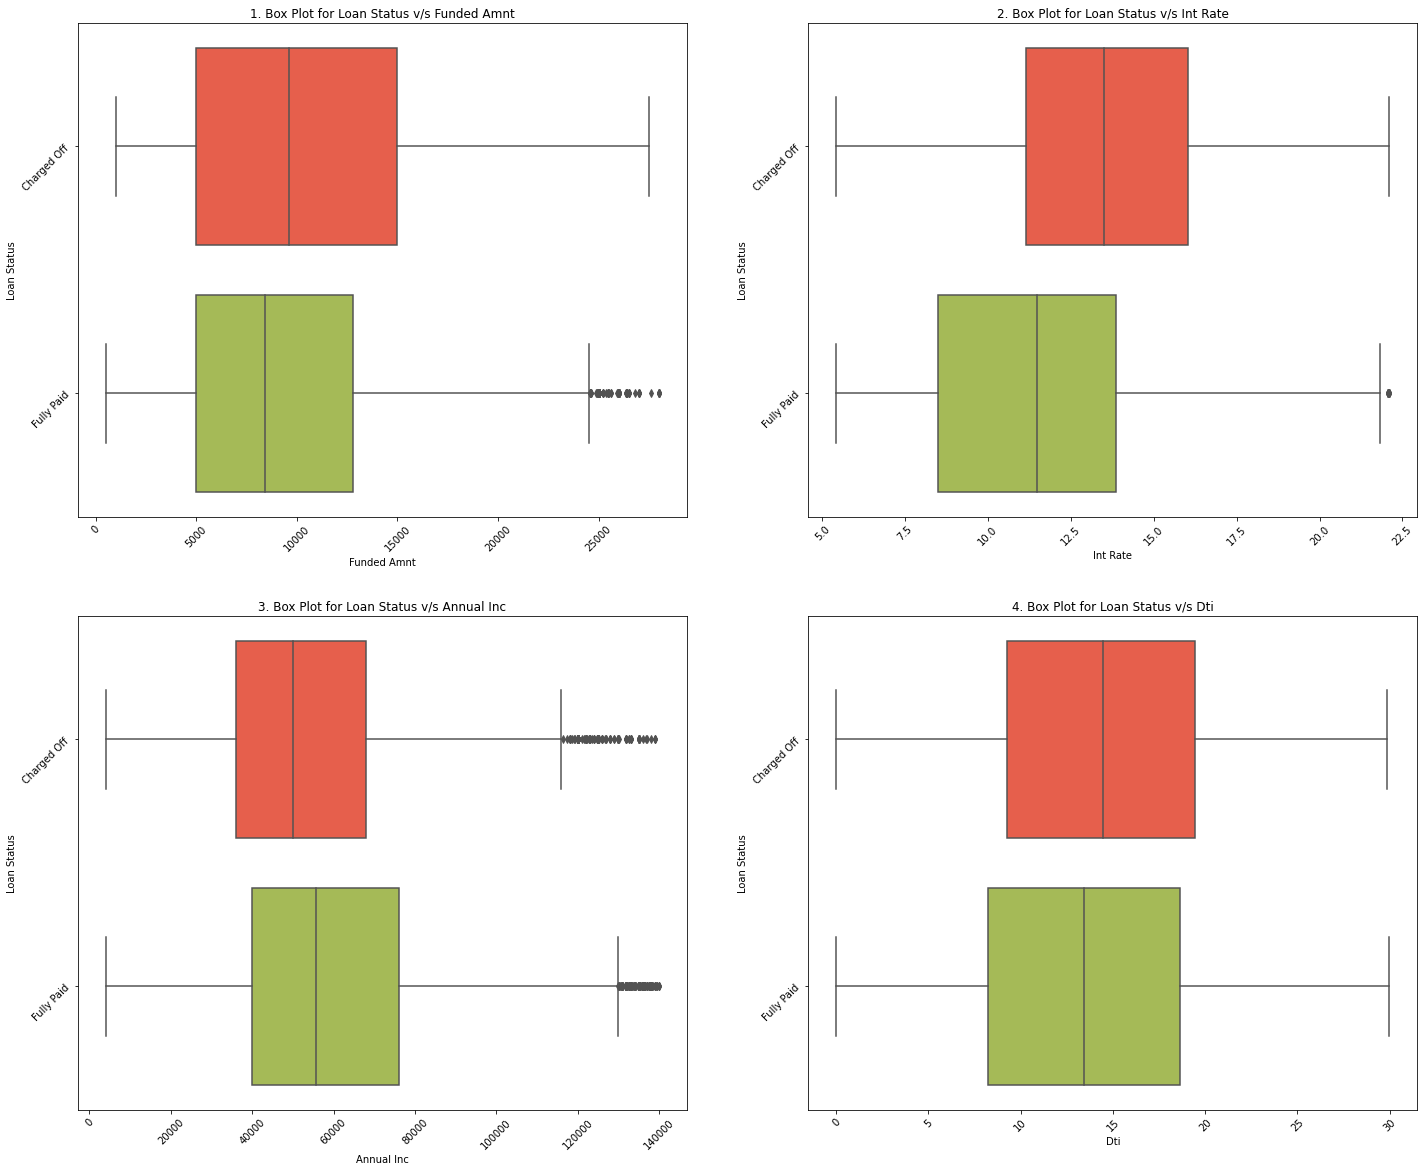

In [50]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(24, 20))
subplots = axs.flatten()

for idx, col in enumerate(['funded_amnt', 'int_rate', 'annual_inc', 'dti']):
    col_name = col.replace('_', ' ').title()
    ax = subplots[idx]

    sns.boxplot(y='loan_status', x=col, data=df, palette=['#FF4C33', "#AECB46"], ax=ax)

    ax.set_title(f"{idx+1}. Box Plot for Loan Status v/s {col_name}")
    ax.set_xlabel(col_name)
    ax.set_ylabel('Loan Status')
    ax.tick_params(labelrotation=45)

plt.show()

- **Funded Amount**: Plot for this is not helping us derive any conclusions.
- **Interest Rate**: We can clearly see that higher interest rates may increase the risk of default.
- **Annual Income**: This plot has many outliers, and it would not be safe to draw any strong conclusions but higher income may slightly reduce the risk of defaulting the loan.
- **Debt-To-Income**: As DTI increases, the risk of defaulting increases as well.

##### Heat Map

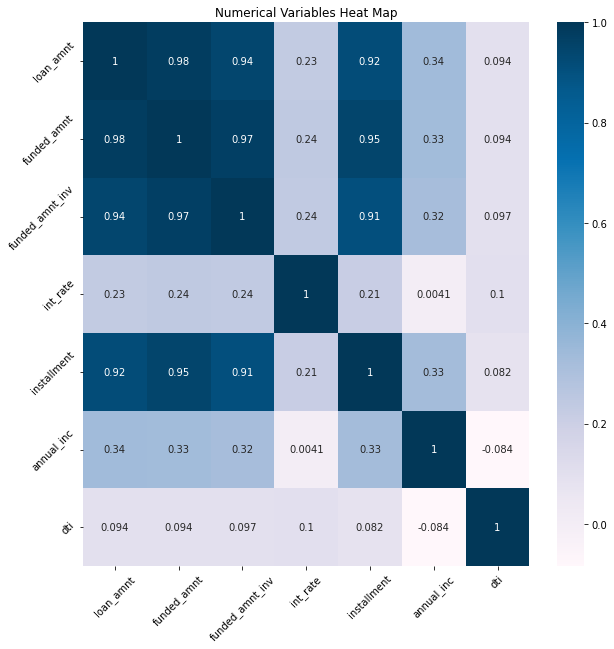

In [51]:
plt.figure(figsize=(10,10))
sns.heatmap(df[numerical_columns].corr(), cmap='PuBu', annot=True)

plt.title("Numerical Variables Heat Map")
plt.yticks(rotation=45)
plt.xticks(rotation=45)

plt.show()

The two variables we can draw analysis from are `int_rate` and `dti`. 

- `int_rate` does show a slightly positive correlation with `loan_amnt`, `funded_amnt`, `funded_amnt_inv`, and `installment`. 
- `dti` does not show much correlation with any of the factors except for a very slight positive correlation with `int_rate` and even slighter negative correlation with `annual_inc` which is expected.



## Step 4. Draw Conclusion

After completing our analysis we have observed that,

- Term has the most impact on default rate, loan term being 60 months are 2.5x more likely to default than 36 months. 
- Loan Grades A through G shows a pattern of increased risk. 
- Employment Length does not show much impact on default rates. 
- Verification Status being source verified and verified slightly increases the default rate.
- Home ownerships being stated mortgaged, owned or rented, very slightly increases the default risk in the order. Mortgaged being the least. 
- Higher the interest rate, higher is the risk of default.
- Higher annual income may very slightly reduce the risk of defaulting the loan.
- As DTI(Debt-To-Income) ratio increases, the risk of default increases as well.